In [17]:
import pandas as pd
###
### original dataset at: https://archive.ics.uci.edu/dataset/186/wine+quality
###

# URL of the white wine dataset
URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

# load the dataset from the URL
white_df = pd.read_csv(URL, sep=";")

# drop all the duplicate records and only keep the first one
white_df = white_df.drop_duplicates(keep='first')


# . Keep Only 5, 6, and 7

# Why?


print(white_df['quality'].value_counts())
# These three classes represent most of the data (78% of the total).
# Minority classes (3, 4, 8, 9) are likely to introduce noise and reduce model performance.
# Focusing on well-represented classes ensures the model can learn meaningful patterns.

# imbalanced dataset, get data with wine quality greater than 4 and less than 8
white_df = white_df[(white_df['quality'] > 4) & (white_df['quality'] < 8)]

# reset index and drop the old one
white_df = white_df.reset_index(drop=True)

quality
6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: count, dtype: int64


In [18]:
white_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000
mean,6.830025,0.275743,0.335446,6.004751,0.046039,35.256846,138.130750,0.993843,3.194346,0.491205,10.558624,5.866922
std,0.845279,0.096687,0.121614,4.914591,0.022995,16.187532,42.239636,0.002914,0.150403,0.111821,1.201766,0.702019
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,5.000000
25%,6.300000,0.210000,0.270000,1.600000,0.036000,23.000000,107.000000,0.991680,3.100000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.800000,0.043000,33.500000,134.000000,0.993600,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.000000,0.050000,46.000000,167.000000,0.995800,3.290000,0.550000,11.400000,6.000000
max,14.200000,0.965000,1.660000,65.800000,0.346000,131.000000,344.000000,1.038980,3.820000,1.080000,14.200000,7.000000


In [19]:
white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3652 non-null   float64
 1   volatile acidity      3652 non-null   float64
 2   citric acid           3652 non-null   float64
 3   residual sugar        3652 non-null   float64
 4   chlorides             3652 non-null   float64
 5   free sulfur dioxide   3652 non-null   float64
 6   total sulfur dioxide  3652 non-null   float64
 7   density               3652 non-null   float64
 8   pH                    3652 non-null   float64
 9   sulphates             3652 non-null   float64
 10  alcohol               3652 non-null   float64
 11  quality               3652 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 342.5 KB


In [20]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [21]:
# count record by each value in quality
white_df['quality'].value_counts()

quality
6    1788
5    1175
7     689
Name: count, dtype: int64

In [22]:
# train a sgd classifier on the data using quality as the target
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Prepare the data
X = white_df.drop('quality', axis=1)
y = white_df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SGDClassifier
sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = sgd_classifier.predict(X_test)

# Evaluate the model (example using accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.46101231190150477
Classification Report:
              precision    recall  f1-score   support

           5       0.00      0.00      0.00       236
           6       0.47      0.88      0.61       353
           7       0.36      0.20      0.26       142

    accuracy                           0.46       731
   macro avg       0.28      0.36      0.29       731
weighted avg       0.30      0.46      0.35       731



/Users/piyush/workspace/projects/MachineLearning/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/piyush/workspace/projects/MachineLearning/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/piyush/workspace/projects/MachineLearning/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

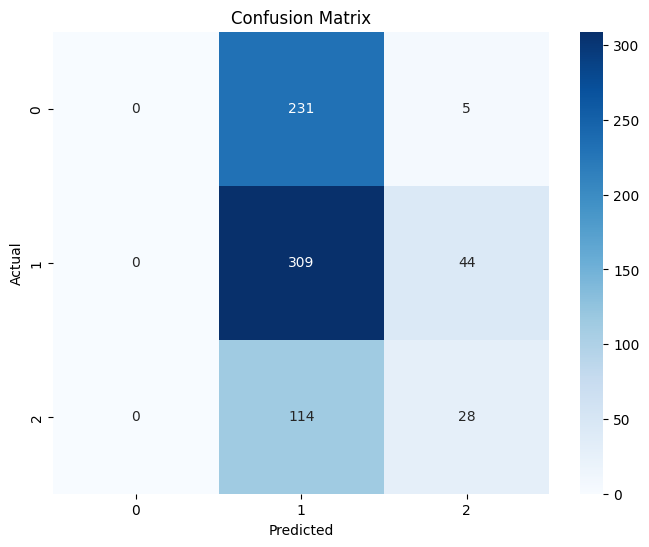

In [23]:
# generate the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined from the previous code

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Competition Question 1:

### Summary of Steps

1. **Loaded and cleaned the dataset.**  
2. **Filtered quality scores** to simplify classification.  
3. **Scaled features** using `StandardScaler`.  
4. **Handled class imbalance** with **SMOTE**.  
5. **Split the data** into training and testing sets.  
6. **Trained a Random Forest Classifier** using **GridSearchCV** for hyperparameter tuning.  
7. **Evaluated the model** using accuracy, classification report, and confusion matrix.

Accuracy: 0.7520969245107176
Classification Report:
              precision    recall  f1-score   support

           5       0.76      0.80      0.78       357
           6       0.68      0.60      0.64       358
           7       0.81      0.85      0.83       358

    accuracy                           0.75      1073
   macro avg       0.75      0.75      0.75      1073
weighted avg       0.75      0.75      0.75      1073



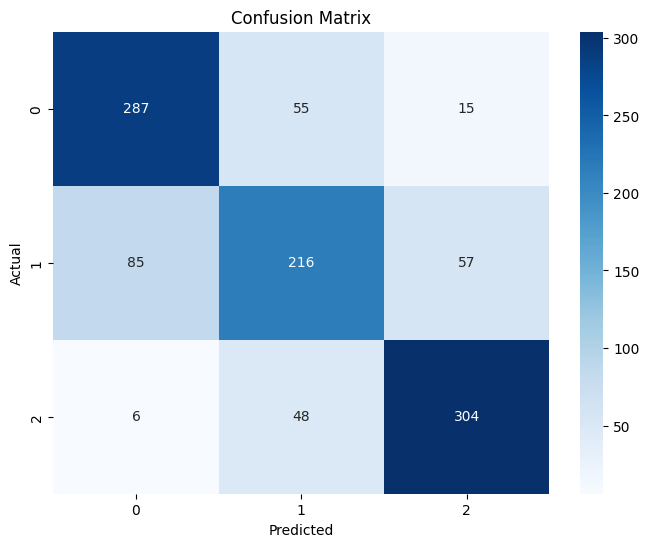

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load the dataset
# Dataset: The dataset contains data on white wine quality, with features like acidity, sugar, and alcohol, and a target column (quality).
URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
white_df = pd.read_csv(URL, sep=";")

# Drop duplicates
# Remove Duplicates: Ensures no duplicate rows remain to prevent data redundancy.
white_df = white_df.drop_duplicates(keep='first')

# Filter dataset
#  Filters the dataset to include only quality scores between 5 and 7. This step removes outliers and simplifies the classification task.
#  Resets the index after filtering for clean data indexing.
white_df = white_df[(white_df['quality'] > 4) & (white_df['quality'] < 8)]
white_df = white_df.reset_index(drop=True)

# Features and target
# X: All columns except quality are features (inputs).
# y: The quality column is the target (output) for classification.
X = white_df.drop('quality', axis=1)
y = white_df['quality']

# Standardize the features
# Standardizes the features so they have a mean of 0 and standard deviation of 1.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle class imbalance using SMOTE
# Balances the classes by creating synthetic samples for underrepresented classes.
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Use RandomForestClassifier with GridSearchCV for hyperparameter tuning
# GridSearchCV: Performs a grid search to find the best combination of hyperparameters using 3-fold cross-validation.
'''
param_grid: Defines a grid of hyperparameters for the Random Forest classifier:
	•	n_estimators: Number of trees in the forest.
	•	max_depth: Maximum depth of each tree.
	•	min_samples_split: Minimum samples required to split a node.
	•	min_samples_leaf: Minimum samples required to be a leaf node.
'''

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best estimator
best_rf = grid_search.best_estimator_

# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [25]:
print(best_rf)

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)


## Competition Question 2 (2pt)

**Evaluate your model performance compared to the baseline model.**

---

### **Model Performance**

1. **My Model (Random Forest Classifier)**:  
   - **Accuracy**: **75.2%**  
   - The model achieved balanced precision, recall, and F1-scores across all classes (`5`, `6`, and `7`).  
   - The confusion matrix shows that most predictions were correctly classified.

2. **Baseline Model (SGDClassifier)**:  
   - **Accuracy**: **46.1%**  
   - The baseline model struggled, particularly for `quality = 5`, where precision and recall were **0%**.  
   - Overall performance was poor, with imbalanced class predictions.

---

### **Comparison and Key Insights**

- **Higher Accuracy**:  
   - My model achieved an accuracy of **75.2%**, significantly higher than the baseline model's **46.1%**.

- **Better Class Balance**:  
   - The Random Forest model effectively classified all three target classes (`5`, `6`, `7`), whereas the baseline model failed to predict certain classes (`quality = 5`).

- **Reasons for Improvement**:  
   - **Random Forest** handles complex, non-linear relationships and feature interactions better.  
   - **Hyperparameter Tuning** using GridSearchCV optimized the model performance.  
   - **SMOTE** ensured class balance, leading to improved predictions for underrepresented classes.
\